# Experiment Description

<p> We are going to optimize an instruction prefix using the GRIPS method. We are going to search for better instruction candidates using 4 different kinds of phrase edits {add, delete, swap, and paraphrase}. </p>

For example: <b>GRIPS for Instruction Prefix</b><br><br>
  - <b>Sentence:</b><br>
  'I hate watching this movie.'<br>

  - <b>Initial Template:</b><br>
  'In this task, your job is to generate the sentiment of the next sentence in the output. I hate watching this movie.'<br>

  - <b>GRIPS</b> will only update the instruction tokens "In this task, your job is to generate the sentiment of the next sentence in the output."<br>

<font color='red'>__Some important considerations__: If you are getting CUDA out-of-memory errors on this notebook, you may try a few things

1. Shutdown other notebooks that are running on the Jupyter instance (go to the “running” tab to see what else is running simultaneously)

2. If you have not done so already, start the notebooks up on an A40 GPU following the readme here: `src/reference_implementations/prompt_zoo/README.md`

3. Reduce the batch size in the commands launching inference or training
</font>

Reducing the batch size is a bit of a last resort for GrIPS as a batch size of 100 helps with prompt optimization quality

<p>Navigate to the directory containing src</p>

In [1]:
import os

os.chdir("../../../../")

# define the user main directory to store predictions and training checkpoints.
os.environ["USER_DIR"] = f"/scratch/ssd004/scratch/{os.environ['USER']}"

In [ ]:
%env LD_LIBRARY_PATH=

env: LD_LIBRARY_PATH=


# Experiment on SemEval Sentiment



In [5]:
!rm -r -f "${USER_DIR}/grips_experiments/semeval"
!mkdir -p "${USER_DIR}/grips_experiments"
!mkdir -p "${USER_DIR}/grips_experiments/semeval"

__Note__ that you can change the argument --grips_initial_prompt and the input text to change the initial prompt from which to search. The initial prompt is strictly prepended to the input_text to create a prompt for the model. 

__Note__ The logging of no instruction used just means that no additional modifications to the prompt are made.

__Note__ This will take some time to run as 50 batches need to complete. 

__Note__ --num_candidates denotes the Number of candidates in each iteration of the algorithm.

__Note__ --num_compose denotes the Number of edits composed to get one candidate.
Recommended value form --num_compose is 1 from the GRIPS paper.

__Note__ --level denotes level at which edit operations occur: {phrase, word, sentence, span}, we use word level search.

In [6]:
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode train \
    --task_name semeval \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file ./resources/datasets/2018-Valence-oc-En-train.txt \
    --dev_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path ${USER_DIR}/grips_experiments/semeval \
    --prediction_file ${USER_DIR}/grips_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --max_epochs 2 \
    --training_steps 50 \
    --num_candidates 5 \
    --num_compose 1 \
    --steps_per_checkpoint 2 \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, your job is to generate the sentiment of the next sentence in the output." \
    --level word

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-27 16:44:12.329171: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 16:44:12.329286: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 16:44:12.329360: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 16:44:12.329430: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dle

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'to', 'generate', 'the', 'next', 'sentiment', 'of', 'the', 'next', 'sentence', 'in', 'the', 'next', 'output', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'to', 'the', 'sentiment', 'of', 'the', 'sentence', 'in', 'the', 'output', '.']
New Candidate:  In this task, your job is to generate to sentiment of to sentence in to output.
Epoch: 0 | Batch: 4 | Mean Loss: 40.86808592457906 | Epoch Loss: 40.86808592457906 | Loss: 39.60852819440055

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'sentence', 'in', 'to', 'output', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'sentence', 'in', 'to', 'output', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'sentence', 'in', 'to', 'output', ',']
New Candidate:  In this , your job is to generate to sentiment of to sentence in to output.
Epoch: 0 | Batch: 9 | Mean Loss: 39.21336117712169 | Epoch Loss: 39.21336117712169 | Loss: 38.75965611949404

evaluating batch with prompt template: ['In', 'this', ',', 'your', 'job', 'is', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'sentence', 'in', 'to', 'output', '.']
edits: ['swap' 'del' 'add' 'sub' 'add']
evaluating batch with prompt template: ['In', 'this', ',', 'your', 'job', 'is', 'of', 'generate', 'of', 'sentiment', 'of', 'of', 'sentence', 'in', 'of', 'output', '.']
evaluating batch with prompt template: ['In', 'this', 'your', 'job', 'is', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'sentence', 'in', 'to', 'output', '.']
evaluating batch with prompt template: ['In', 'this', ',', 'your', 'job', 'is', 'to

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'There', 'was', '', 'a', 'sentence', 'in', 'to', 'output', 'There']
New Candidate:  In this task, your job is to generate to sentiment  to There was a sentence in to output.
Epoch: 1 | Batch: 2 | Mean Loss: 39.79694847619229 | Epoch Loss: 39.995736106367524 | Loss: 40.283956989380435

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'to', 'generate', 'to', 'sentiment', 'to', 'There', 'was', '', 'a', 'sentence', 'in', 'to', 'output', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'to', 'generate', 'to', 'sentiment', 'to', 'There', 'was', '', 'a', 'sentence', 'in', 'to', 'output', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'is', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'sentence', 'in', 'to', 'output', '.']
edits: ['sw

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'I', 's', 'That', "'", 's', 'that', 'right', '?', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'sentence', 'in', 'to', 'output', '.']
New Candidate:  In this task, your job Is that right? to generate to sentiment of to that in to output.
Epoch: 1 | Batch: 7 | Mean Loss: 39.23907492781466 | Epoch Loss: 38.33951673921734 | Loss: 36.10436771518539

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'I', 's', 'that', 'right', '?', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'that', 'in', 'to', 'output', '.']
edits: ['add' 'add' 'swap' 'add' 'swap']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'I', 's', 'that', 'right', '?', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'that', 'in', 'of', 'to', 'output', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'task', 'job', 'I', 's', 'that', 'right', '?', '

evaluating batch with prompt template: ['In', 'this', 'It', "'", 's', '', 'a', 'task', ',', 'your', 'job', 'I', 's', 'that', 'right', '?', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'sentence', 'in', 'to', 'output', '.']
Epoch: 1 | Batch: 12 | Mean Loss: 39.47282061781436 | Epoch Loss: 39.18182403113228 | Loss: 47.72038423402677

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'I', 's', 'that', 'right', '?', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'sentence', 'in', 'to', 'output', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'I', 's', 'that', 'right', '?', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'sentence', 'in', 'to', 'output', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'your', 'job', 'I', 's', 'that', 'right', '?', 'to', 'generate', 'to', 'sentiment', 'of', 'to', 'sentence', 'in', 'to', 'output', '.']
evaluating batch with prompt template: ['In', 'this', 't

Below we evaluate what the performance of our original prompt was on the evaluation set

In [7]:
# test with the default initial prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode no_finetune_test \
    --task_name semeval \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path ${USER_DIR}/grips_experiments/semeval \
    --prediction_file ${USER_DIR}/grips_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, your job is to generate the sentiment of the next sentence in the output."

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-27 17:00:56.376822: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 17:00:56.377187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 17:00:56.377520: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 17:00:56.377826: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dle

Next we load the best prompt that we computed in our search above and test it's performance on the evaluation set

In [8]:
# test with the best saved prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode test \
    --task_name semeval \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path ${USER_DIR}/grips_experiments/semeval \
    --prediction_file ${USER_DIR}/grips_experiments/semeval/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, your job is to generate the sentiment of the next sentence in the output."

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-27 17:01:57.045079: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 17:01:57.045355: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 17:01:57.045587: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 17:01:57.045781: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dle

In [9]:
# You can also run the tensorboard from the node to monitor training status as we are training with grips.
!tensorboard --logdir=${USER_DIR}/grips_experiments/semeval --bind_all

2023-04-27 17:03:00.130600: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 17:03:00.130633: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-27 17:03:02.184585: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 17:03:02.239742: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 17:03:02.242139: W external/org_tensorflow/tensorflow/tsl/pl

To view the tensorboard, we have to create another ssh tunnel from the local computer to the gpu node.
use the following command with the port specified by the tensorboard command above (e.g. 6006)
then type following URL in your local web browser: http://localhost:6006/

`ssh username@v.vectorinstitute.ai -L 6006:gpu001:6006`

__NOTE__: Before running any additional cells, you'll need to stop the tensorboard cell with the stop button

# GRIPS Result on SemEval
We see that the GRIPS search could find the following optimal prompt tokens.

['In', 'this', 'task', ',', 'your', 'job', 'I', 's', 'that', 'right', '?', 'to', 'generate', 'sentiment', 'of', 'to', 'sentence', 'in', 'output', '.']

The new template increase the performance to 61.02% accuracy from 59.0% with the original instruction.

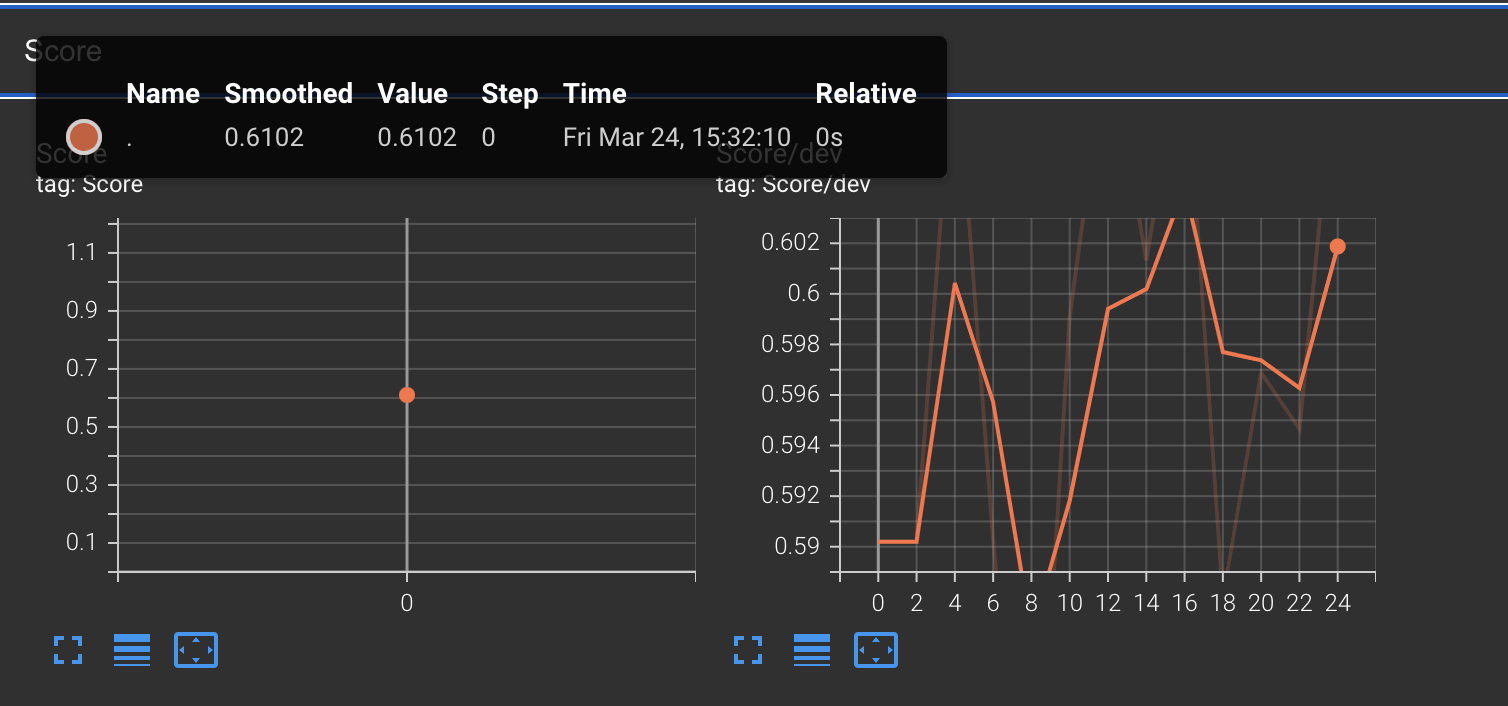

# Experiments on SST-2 Binary Sentiment Classification Task


Similar to SemEval, we can run the grips to further optimize the instruction at the start on the SST-2 dataset.

In [10]:
!rm -r -f "${USER_DIR}/grips_experiments/sst2"
!mkdir -p "${USER_DIR}/grips_experiments"
!mkdir -p "${USER_DIR}/grips_experiments/sst2"

__Note__ that you can change the argument --grips_initial_prompt and the input text to change the initial prompt from which to search. The initial prompt is strictly prepended to the input_text to create a prompt for the model. 

__Note__ The logging on no instruction used just means that no additional modifications to the prompt are made.

__Note__ This will take some time to run as 50 batches need to be completed

In [ ]:
# Search only for 50 training steps!
# Change the argument --grips_initial_prompt for another initial prompt.
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode train \
    --task_name sst2 \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path ${USER_DIR}/grips_experiments/sst2 \
    --prediction_file ${USER_DIR}/grips_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --max_epochs 1 \
    --training_steps 50 \
    --num_candidates 5 \
    --num_compose 1 \
    --steps_per_checkpoint 2 \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, you are given sentences from movie reviews. \
            The task is to classify a sentence as positive if the sentiment of the \
            sentence is great or as negative if the sentiment of the sentence is terrible." \
    --level word

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-27 17:03:47.190356: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 17:03:47.190468: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 17:03:47.190542: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-04-27 17:03:47.190612: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dle

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'given', 'sentences', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', 'to', 'class', 'ify', '', 'a', 'sentence', 'as', 'positive', '', 'if', 'The', 'person', 'sentiment', 'of', 'The', 'person', 'sentence', 'is', 'great', 'or', 'as', 'negative', '', 'if', 'The', 'person', 'sentiment', 'of', 'The', 'person', 'sentence', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'given', 'sentences', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', 'to', 'sentiment', '', 'a', 'sentence', 'as', 'positive', '', 'if', 'The', 'person', 'sentiment', 'of', 'The', 'person', 'sentence', 'is', 'great', 'or', 'as', 'negative', '', 'if', 'The', 'person', 'sentiment', 'of', 'The', 'person', 'sentence', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', '', 're', 'given', 'sentences', 'from', 'movie', 'reviews', '

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'given', 'sentences', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', '', 'if', 'The', 'person', 'sentiment', 'of', 'The', 'person', 'this', 'is', 'great', 'or', 'as', 'negative', '', 'if', 'The', 'person', 'sentiment', 'of', 'The', 'person', 'this', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'There', 'is', '', 'a', 'task', ',', 'you', 'are', 'given', 'sentences', 'from', 'movie', 'reviews', '', '.', 'The', 'There', 'is', '', 'a', 'task', 'is', 'to', 'class', 'ify', '', 'a', 'to', 'as', 'positive', '', 'if', 'The', 'person', 'sentiment', 'of', 'The', 'person', 'to', 'is', 'great', 'or', 'as', 'negative', '', 'if', 'The', 'person', 'sentiment', 'of', 'The', 'person', 'to', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'are', 'given', 'sentences', 'from', '

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', '', 'if', 'The', 'person', 'sentiment', 'of', 'The', 'person', 'this', 'is', 'great', 'or', 'as', 'negative', '', 'if', 'The', 'person', 'sentiment', 'of', 'The', 'person', 'this', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'as', 'given', 'sentences', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', '', 'if', 'The', 'person', 'sentiment', 'of', 'The', 'person', 'this', 'is', 'great', 'or', 'as', 'negative', '', 'if', 'The', 'person', 'sentiment', 'of', 'The', 'person', 'this', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', '

evaluating batch with prompt template: ['this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', '', 'if', 'sentiment', 'of', 'The', 'person', '', 'if', 'this', 'is', 'great', 'or', 'as', 'negative', 'The', 'person', '', 'if', 'sentiment', 'of', 'The', 'person', '', 'if', 'this', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'The', 'person', '', 'if', 'sentiment', 'of', 'The', 'person', '', 'if', 'this', 'is', 'great', 'or', 'as', 'negative', 'The', 'person', '', 'if', 'sentiment', 'of', 'The', 'person', '', 'if', 'this', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'reviews', ''

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', '', 'if', 'It', "'", 's', 'sentiment', 'of', 'The', 'person', '', 'if', 'this', 'is', 'great', 'or', 'as', 'The', 'person', '', 'if', 'It', "'", 's', 'sentiment', 'of', 'The', 'person', '', 'if', 'this', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'I', 's', 'that', 'true', '?', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', '', 'if', 'sentiment', 'of', 'The', 'person', '', 'if', 'this', 'I', 's', 'that', 'true', '?', 'great', 'or', 'as', 'The', 'person', '', 'if', 'sentiment', 'of', 'The', 'person', '', 'if', 'this', 'I', 's', 'that', 'true', '?', 'terrible', '.']
evaluating batch with prompt te

evaluating batch with prompt template: ['In', 'given', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'given', 'class', 'ify', '', 'a', 'given', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'given', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'given', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'person', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'person', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this'

W0427 17:11:57.752057 140654109347968 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0427 17:11:57.756011 140654109347968 arrow_dataset.py:3036] Loading cached processed dataset at /h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5/cache-729fd6438998cb66.arrow
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'wh

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'grea

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'negative', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'negative', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'negative', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'negative', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'negative', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'Do', 'you', 'class', 'ify', '?', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'per

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'thing', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'thing', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'thing', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'thing', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'thing', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'positive', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'positive', 'If', 'that', "'", 's',

evaluating batch with prompt template: ['In', 'negative', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'positive', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'positive', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'positive', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'positive', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'terrible', '.']
W0427 17:15:33.753113 140654109347968 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0427 17:15:33.757329 140654109347968 arrow_dataset.py:3036] Loading cached processed dataset at /h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'task', 'that', 'I', 't', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'task', 'that', 'I', 't', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'task', 'that', 'I', 't', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'task', 'that', 'I', 't', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'terrible', '.']
New Candidate:  In this task, you as given sentences from movie Reviews . The task is this classify a this as positive The person If 's what it would be sentiment of The person If 's what it would be this is great or as The person If 's what it would be sentiment of The person If 's what it would be this is terrible.
Epoch: 0 | Batch: 20 | Mean Lo

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'this', 'is', 'terrible', '.']
edits: ['add' 'del' 'sub' 'swap' 'del']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', '

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'from', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'from', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'from', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'from', 'this', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'class', 'ify', '', 'a', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'would', 'be', 'is', 'grea

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'be', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'be', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'be', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'be', 'be', 'this', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'be', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Wou

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'it', 'Would', 'If', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'it', 'Would', 'If', 'be', 'this', 'is', 'terrible', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'A', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'A', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'this

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'that', "'", 's', 'what', 'it', 'Would', 'be', 'sentiment', 'of', 'The', 'person', 'that', "'", 's', 'what', 'it', 'Would', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'that', "'", 's', 'what', 'it', 'Would', 'be', 'sentiment', 'of', 'The', 'person', 'that', "'", 's', 'what', 'it', 'Would', 'be', 'this', 'is', 'terrible', 'from', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'this', 'is', 'great', 'or', 'as', 'person',

evaluating batch with prompt template: ['In', ',', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', ',', 'class', 'ify', '', 'a', ',', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'Of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', ',', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'Of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', ',', 'is', 'terrible', 'from', '.']
W0427 17:21:37.317870 140654109347968 builder.py:785] Found cached dataset sst2 (/h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac50c72282bcb8fe755accc671a57dd8059d4e130961ed5)
W0427 17:21:37.322143 140654109347968 arrow_dataset.py:3036] Loading cached processed dataset at /h/snajafi/.cache/huggingface/datasets/sst2/default/2.0.0/9896208a8d85db057ac5

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'It', 'was', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'It', 'was', 'Would', 'If', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'It', 'was', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'It', 'was', 'Would', 'If', 'be', 'this', 'is', 'terrible', 'from', '.']
New Candidate:  In this task, you as given sentences from movie Reviews . The task is this classify a this as positive The person If that it Would If be sentiment of The person If that it Would If be this is great or as The person If that it Would If be sentiment of The person If that it Would If be this is terrible from.
Epoch: 0 | Batch: 30 | Mean Loss: 15.30682901

New Candidate:  In  task, you as given sentences from movie Reviews . The task is  classify a  as positive The person If that's what it Would If be sentiment of The person If that's what it Would If be  is great or as The person If that's what it Would If be sentiment of The person If that's what it Would If be  is terrible from.
Epoch: 0 | Batch: 31 | Mean Loss: 15.24650737075181 | Epoch Loss: 15.24650737075181 | Loss: 13.436857927235422

evaluating batch with prompt template: ['In', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'class', 'ify', '', 'a', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If'

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'this', 'is', 'terrible', 'from', '.']
edits: ['swap' 'swap' 'add' 'add' 'swap']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'from', 'that', "'", 's', 'what', 'it', 'Would', 'from', 'be', 'sentiment', 'of', 'The'

New Candidate:  what In this task, you as given sentences from movie Reviews . The task is this classify a this as positive The person as that's what it Would as be sentiment of The person as that's what it Would as be this is great or as The person as that's what it Would as be sentiment of The person as that's what it Would as be this is terrible from.
Notice! Prev tracker:  ['what', "'s", 'this']
Notice! New tracker:  ["'s", 'this']
Epoch: 0 | Batch: 34 | Mean Loss: 15.163036291716294 | Epoch Loss: 15.163036291716294 | Loss: 11.775916682934849

evaluating batch with prompt template: ['what', 'In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'as', 'that', "'", 's', 'what', 'it', 'Would', 'as', 'be', 'sentiment', 'of', 'The', 'person', 'as', 'that', "'", 's', 'what', 'it', 'Would', 'as', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'perso

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'be', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'be', 'Would', 'If', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'be', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'be', 'Would', 'If', 'be', 'this', 'is', 'terrible', 'from', '.']
edits: ['swap' 'swap' 'sub' 'swap' 'sub']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'The', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'be', 'Would', 'If', 'be', 'sentiment', 'of', 'The', '

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'this', 'is', 'terrible', 'from', '.']
edits: ['swap' 'del' 'swap' 'del' 'add']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'person', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 

evaluating batch with prompt template: ['In', 'this', 'task', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'Would', 'If', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'Would', 'If', 'be', 'this', 'is', 'terrible', 'from', '.']
evaluating batch with prompt template: ['In', 'this', 'task', 'you', 'as', 'given', 'sentences', 'from', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'Would', 'If', 'be', 'this', 'is', 'great'

evaluating batch with prompt template: ['In', 'this', 'task', 'be', 'you', 'as', 'given', 'sentences', 'from', 'this', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'If', 'be', 'this', 'is', 'terrible', 'from', 'this', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'this', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'that', "'", 's', 'what', 'it', 'Would', 'be', 'sentiment', 'of', 'The', 'person', 'that', "'", 's', 'wh

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'this', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'it', 'do', 'that', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'it', 'do', 'that', 'If', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'it', 'do', 'that', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'it', 'do', 'that', 'If', 'be', 'this', 'is', 'terrible', 'from', 'this', '.']
evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'this', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', '

New Candidate:  In this task, you as given sentences from this movie Reviews . The task is this classify a this as positive The person If that's what it Would do it that If be sentiment of's The person If that's what it Would do it that If be this is great or as The person If that's what it Would do it that If be sentiment of's The person If that's what it Would do it that If be this is terrible from this.
Notice! Prev tracker:  [',', 'it']
Notice! New tracker:  [',']
Epoch: 0 | Batch: 42 | Mean Loss: 15.041973770370708 | Epoch Loss: 15.041973770370708 | Loss: 13.67726801325611

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'this', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'class', 'ify', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'do', 'it', 'that', 'If', 'be', 'sentiment', 'of', "'", 's', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would'

evaluating batch with prompt template: ['In', 'this', 'task', ',', 'you', 'as', 'given', 'sentences', 'from', 'this', 'movie', 'Reviews', '', '.', 'The', 'task', 'is', 'this', 'as', '', 'a', 'this', 'as', 'positive', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'do', 'that', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'do', 'that', 'If', 'be', 'this', 'is', 'great', 'or', 'as', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'do', 'that', 'If', 'be', 'sentiment', 'of', 'The', 'person', 'If', 'that', "'", 's', 'what', 'it', 'Would', 'do', 'that', 'If', 'be', 'this', 'is', 'terrible', 'from', 'this', '.']
New Candidate:  In this task, you as given sentences from this movie Reviews . The task is this as a this as positive The person If that's what it Would do that If be sentiment of The person If that's what it Would do that If be this is great or as The person If that's what it Would do that If be senti

Below we evaluate what the performance of our original prompt was on the evaluation set

In [ ]:
# test with the default initial prompt
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode no_finetune_test \
    --task_name sst2 \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file validation \
    --model_path ${USER_DIR}/grips_experiments/sst2 \
    --prediction_file ${USER_DIR}/grips_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, you are given sentences from movie reviews. \
            The task is to classify a sentence as positive if the sentiment of the \
            sentence is great or as negative if the sentiment of the sentence is terrible." \

Next we load the best prompt that we computed in our search above and test it's performance on the evaluation set

In [ ]:
# test on sst2
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 100 \
    --mode test \
    --task_name sst2 \
    --t5_exp_type grips \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file validation \
    --model_path ${USER_DIR}/grips_experiments/sst2 \
    --prediction_file ${USER_DIR}/grips_experiments/sst2/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt \
    --checkpoint best_step \
    --meta_dir . \
    --meta_name search.txt \
    --grips_initial_prompt "In this task, you are given sentences from movie reviews. \
            The task is to classify a sentence as positive if the sentiment of the \
            sentence is great or as negative if the sentiment of the sentence is terrible." \

In [ ]:
# re-launch the tensorboard to view the updated results with sst2
!tensorboard --logdir=${USER_DIR}/grips_experiments/sst2 --bind_all

To view the tensorboard, we have to create another ssh tunnel from the local computer to the gpu node.
use the following command with the port specified by the tensorboard command above (e.g. 6006)
then type following URL in your local web browser: http://localhost:6006/

`ssh username@v.vectorinstitute.ai -L 6006:gpu001:6006`

__NOTE__: Before running any additional cells, you'll need to stop the tensorboard cell with the stop button

# Results from SST2

As seen in the prediction, the instruction template ['In', 'this', ',', 'you', '', 'if', 'given', 'sentences', 'from', 'movie', 'reviews', '', '.', 'or', 'to', 'class', 'ify', '', 'a', '.', 'as', 'It', '', '.', 'positive', '', 'if', 'given', 'sentiment', 'given', '', '.', 'or', 'great', 'as', 'or', 'as', 'negative', '', 'if', 'given', 'sentiment', 'given', '', '.', 'or', 'terrible', '.'] achieves an impressive 82.34% accuracy on the sst2 dev set while the original template "In this task, you are given sentences from movie reviews. The task is to classify a sentence as 'great' if the sentiment of the sentence is positive or as 'terrible' if the sentiment of the sentence is negative." only achieved 61.93%.

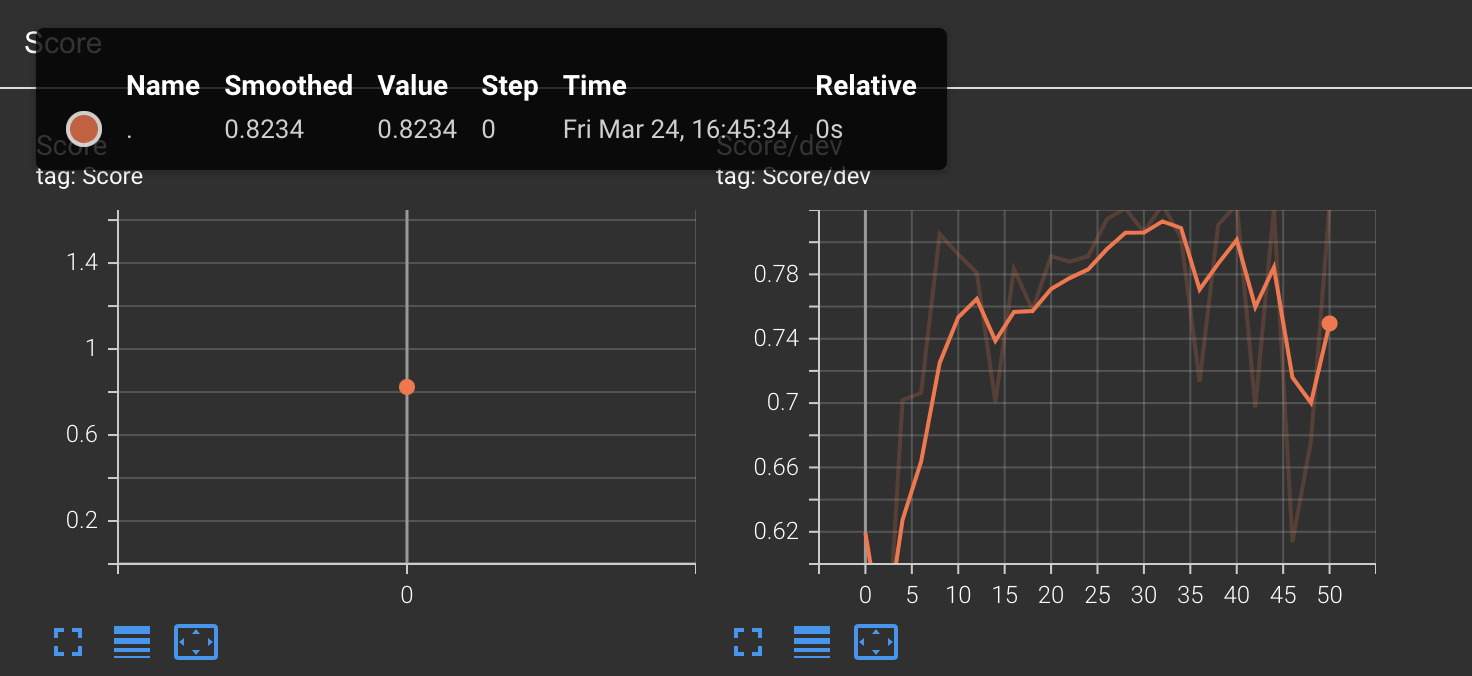